In [1]:
#Feature Selection

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
dataset=pd.read_csv("prep_data.csv",index_col=None)

In [4]:
dataset

,employee_id,department,region_number,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score,promotion
0,8724,Technology,26,Bachelors,m,sourcing,1,24,0.0,1,1,0,77,No
1,74430,HR,4,Bachelors,f,other,1,31,3.0,5,0,0,51,No
2,72255,Sales & Marketing,13,Bachelors,m,other,1,31,1.0,4,0,0,47,No
3,38562,Procurement,2,Bachelors,f,other,3,31,2.0,9,0,0,65,No
4,64486,Finance,29,Bachelors,m,sourcing,1,30,4.0,7,0,0,61,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17409,54192,HR,22,Below Secondary,m,other,1,24,2.0,2,0,0,47,No
17410,57239,Sales & Marketing,31,Bachelors,m,other,1,42,3.0,10,0,0,53,No
17411,73858,Sales & Marketing,25,Bachelors,m,sourcing,2,28,2.0,5,0,0,45,No
17412,64573,Technology,7,Bachelors,f,referred,2,30,5.0,6,1,0,81,No


In [5]:
df2 = pd.get_dummies(dataset,drop_first=True)

In [6]:
df2

,employee_id,region_number,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score,department_Finance,...,department_R&D,department_Sales & Marketing,department_Technology,education_Below Secondary,education_Masters & above,education_Unknown,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,promotion_Yes
0,8724,26,1,24,0.0,1,1,0,77,0,...,0,0,1,0,0,0,1,0,1,0
1,74430,4,1,31,3.0,5,0,0,51,0,...,0,0,0,0,0,0,0,0,0,0
2,72255,13,1,31,1.0,4,0,0,47,0,...,0,1,0,0,0,0,1,0,0,0
3,38562,2,3,31,2.0,9,0,0,65,0,...,0,0,0,0,0,0,0,0,0,0
4,64486,29,1,30,4.0,7,0,0,61,1,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17409,54192,22,1,24,2.0,2,0,0,47,0,...,0,0,0,1,0,0,1,0,0,0
17410,57239,31,1,42,3.0,10,0,0,53,0,...,0,1,0,0,0,0,1,0,0,0
17411,73858,25,2,28,2.0,5,0,0,45,0,...,0,1,0,0,0,0,1,0,1,0
17412,64573,7,2,30,5.0,6,1,0,81,0,...,0,0,1,0,0,0,0,1,0,0


In [7]:
indep_X=df2.drop("promotion_Yes",1)
dep_Y= df2['promotion_Yes']

#Feature Selection

In [8]:
X_train, X_test, y_train, y_test = train_test_split(indep_X, dep_Y, test_size = 0.2, random_state = 42)
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [9]:
rf_model=RandomForestClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)

In [10]:
rf_model=rf_model.fit(X_train_scaled,y_train)

In [11]:
 #Retrieve feature importance scores make a list
feature_importances =list(rf_model.feature_importances_)
feature_importances

[0.043504848412645424,
 0.018860142643909335,
 0.007251357983666148,
 0.03515229210796383,
 0.06476722534180591,
 0.059208954192822155,
 0.0055942388543654305,
 0.6713060163634917,
 0.05279905465698632,
 0.005127013636294433,
 0.0008229775531389533,
 0.001358762548690149,
 0.0032830855567106887,
 0.0038456540865279016,
 0.00013321005970168238,
 0.004288202366502582,
 0.0038206967592070954,
 0.001338830984191898,
 0.006211744159359438,
 0.0009253684290461435,
 0.005210005628180433,
 0.0004760084140569683,
 0.0047143092607355]

In [12]:
#Display feature importances in descending order
feature_importances_sorted = sorted(zip(indep_X.columns, feature_importances), key=lambda x: x[1], reverse=True)

for feature, importance in feature_importances_sorted:
    print(f'{feature}: {importance}')

awards_won: 0.6713060163634917
previous_year_rating: 0.06476722534180591
length_of_service: 0.059208954192822155
avg_training_score: 0.05279905465698632
employee_id: 0.043504848412645424
age: 0.03515229210796383
region_number: 0.018860142643909335
no_of_trainings: 0.007251357983666148
education_Masters & above: 0.006211744159359438
KPIs_met_more_than_80: 0.0055942388543654305
gender_m: 0.005210005628180433
department_Finance: 0.005127013636294433
recruitment_channel_sourcing: 0.0047143092607355
department_Sales & Marketing: 0.004288202366502582
department_Procurement: 0.0038456540865279016
department_Technology: 0.0038206967592070954
department_Operations: 0.0032830855567106887
department_Legal: 0.001358762548690149
education_Below Secondary: 0.001338830984191898
education_Unknown: 0.0009253684290461435
department_HR: 0.0008229775531389533
recruitment_channel_referred: 0.0004760084140569683
department_R&D: 0.00013321005970168238


In [13]:
# Extract features and importance scores separately from the sorted list
features_sorted, importance_scores_sorted = zip(*feature_importances_sorted)

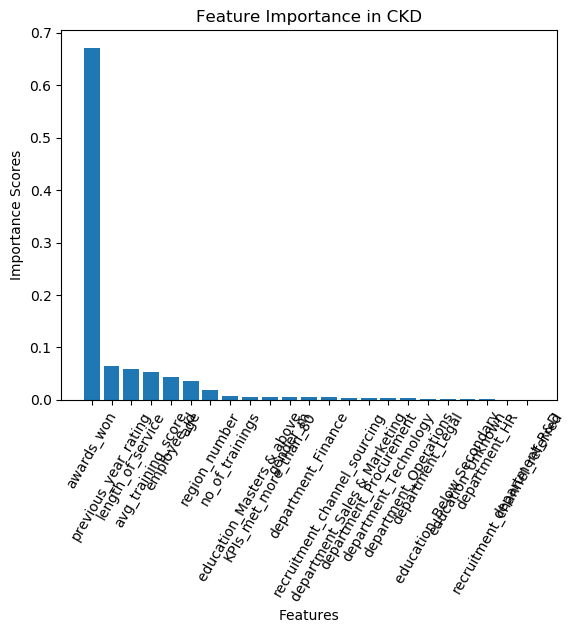

In [14]:
#Plotting feature importance
plt.bar(features_sorted,importance_scores_sorted)
plt.xlabel('Features')
plt.ylabel('Importance Scores')
plt.title('Feature Importance in CKD')

#Rotate x-axis labels for better readability
plt.xticks(rotation=60)
plt.show()

In [15]:
def log_model_feature(X_train_scaled, y_train, threshold=0.1):
    
    log_model=LogisticRegression(solver='lbfgs')
    Log_model=log_model.fit(X_train_scaled, y_train)
    #Get feature importances
    #Feature_importances = list(Log_model.feature_importances_)

    Feature_importances = list(Log_model.coef_)
    # Create a sorted list of feature importances
    Feature_importances_sorted = sorted(zip(indep_X.columns, Feature_importances), key=lambda x: x[1], reverse=True)
    # Display feature importances
    for feature, importance in Feature_importances_sorted:
        #print(f'{feature}: {importance}')   
    # Extract features and importance scores separately from the sorted list
        features_sorted,importance_scores_sorted = zip(*Feature_importances_sorted)
        # Select features based on the importance threshold
       # selected_features = [feature for feature, importance in Feature_importances_sorted if importance > threshold]
        log_features = [feature for feature, importance in Feature_importances_sorted if any(np.array(importance) > threshold)]
       #print("\nSelected features:")
        print(log_features)
    
        return log_features
    
    
def DecisionTree_Feature(X_train_scaled, y_train, threshold=0.1):

    dt_model=DecisionTreeClassifier(max_depth=None, min_samples_split=2,random_state=0)
    DT_model=dt_model.fit(X_train_scaled, y_train)
    # Get feature importances
    feature_importances = list(DT_model.feature_importances_)
    # Create a sorted list of feature importances
    feature_importances_sorted = sorted(zip(indep_X.columns, feature_importances), key=lambda x: x[1], reverse=True)
    # Display feature importances
    for feature, importance in feature_importances_sorted:
        #print(f'{feature}: {importance}')   
    # Extract features and importance scores separately from the sorted list
        features_sorted,importance_scores_sorted = zip(*feature_importances_sorted)
        # Select features based on the importance threshold
        DT_features = [feature for feature, importance in feature_importances_sorted if importance > threshold]
        #print("\nSelected features:")
        print(DT_features)

        return DT_features 


def SVML_feature(X_train_scaled, y_train, threshold=0.1):

    SVM=SVC(kernel='linear',random_state=0)
    SVM_model=SVM.fit(X_train_scaled, y_train)
    # Get feature importances
    feature_importances = list(SVM_model.coef_)
    # Create a sorted list of feature importances
    feature_importances_sorted = sorted(zip(indep_X.columns, feature_importances), key=lambda x: x[1], reverse=True)
    # Display feature importances
    for feature, importance in feature_importances_sorted:
        #print(f'{feature}: {importance}')   
    # Extract features and importance scores separately from the sorted list
        features_sorted,importance_scores_sorted = zip(*feature_importances_sorted)
        # Select features based on the importance threshold
    svml_features = [feature for feature, importance in feature_importances_sorted if any(np.array(importance) > threshold)]
        #print("\nSelected features:")
    print(svml_features)

    return svml_features


def SVMNL_feature(X_train_scaled, y_train, threshold=0.1):

    svm_model=SVC(kernel='rbf',random_state=0)
    SVMNL_model=svm_model.fit(X_train_scaled, y_train)
    # Get the indices of support vectors
    support_vector_indices = list(SVMNL_model.support_)
    # Get the coefficients (dual coefficients) associated with support vectors
    support_vector_coefficients = abs(SVMNL_model.dual_coef_)
    # Map the coefficients to the corresponding features
    feature_importances = {feature_index: coefficient for feature_index, coefficient in zip(support_vector_indices, support_vector_coefficients[0])}
    # Sort features by importance
    sorted_features = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

    # Print or use the sorted features as needed
    print("Feature importances:")
    for feature_index, importance in sorted_features:
        #print(f"Feature {feature_index}: {importance}")
        
        #Select features based on the importance threshold
        svmnl_features = [feature for feature, importance in feature_importances_sorted if importance > threshold]
        print(svmnl_features)

        return svmnl_features 
    
    

def random_feature(X_train_scaled, y_train, threshold=0.1):
    
    rf_model=RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
    rf_model=rf_model.fit(X_train_scaled, y_train)
    # Get feature importances
    feature_importances = list(rf_model.feature_importances_)
    # Create a sorted list of feature importances
    feature_importances_sorted = sorted(zip(indep_X.columns, feature_importances), key=lambda x: x[1], reverse=True)
    # Display feature importances
    for feature, importance in feature_importances_sorted:
        #print(f'{feature}: {importance}')   
    # Extract features and importance scores separately from the sorted list
        features_sorted,importance_scores_sorted = zip(*feature_importances_sorted)
        # Select features based on the importance threshold
        rf_selected_features = [feature for feature, importance in feature_importances_sorted if importance > threshold]
        #print("\nSelected features:")
        print(rf_selected_features)

        return rf_selected_features

In [16]:
log_features=log_model_feature(X_train_scaled, y_train, threshold=0.3)

print(log_features)

['employee_id']
['employee_id']


In [17]:
DT_features = DecisionTree_Feature(X_train_scaled, y_train, threshold=0.3)

print(DT_features)

['awards_won']
['awards_won']


In [18]:
svml_features = SVML_feature(X_train_scaled, y_train, threshold=0.3)
print(svml_features)

['employee_id']
['employee_id']


In [19]:
svmnl_features = SVMNL_feature(X_train_scaled, y_train, threshold=0.3)
print(svmnl_features)

Feature importances:
['awards_won']
['awards_won']


In [20]:
rf_selected_features=random_feature(X_train_scaled, y_train, threshold=0.3)
#rf_selected_features=result5
print(rf_selected_features)

['awards_won']
['awards_won']


In [21]:
def log_input(log_features):
    
    # Convert feature names to column indices
    feature_indices = [indep_X.columns.get_loc(feature) for feature in log_features]
    # Assuming X_train_scaled and X_test_scaled are numpy arrays
    #X_train_current contains log_features as keys and the corresponding columns from the X_train_scaled array as values. 
    #The values are obtained by slicing the X_train_scaled array using the index from the feature_indices list.
    X_train_current = {feature: X_train_scaled[:, int(index)] for feature, index in zip(log_features, feature_indices)}
    X_test_current = {feature: X_test_scaled[:, int(index)] for feature, index in zip(log_features, feature_indices)}
    # Convert dictionaries to numpy arrays
    #X_train_current_array = np.column_stack(list(X_train_current.values()))
    #X_test_current_array = np.column_stack(list(X_test_current.values()))
    #np.column_stack() function is used to stack the list of NumPy arrays as columns into a new 2D NumPy array
    #called log_X_train.
    log_X_train= np.column_stack(list(X_train_current.values()))
    log_X_test = np.column_stack(list(X_test_current.values()))

    return log_X_train,log_X_test



def DT_input(DT_features):
    
    # Convert feature names to column indices
    feature_indices = [indep_X.columns.get_loc(feature) for feature in DT_features]
    # Assuming X_train_scaled and X_test_scaled are numpy arrays
    X_train_current = {feature: X_train_scaled[:, int(index)] for feature, index in zip(DT_features, feature_indices)}
    X_test_current = {feature: X_test_scaled[:, int(index)] for feature, index in zip(DT_features, feature_indices)}
    # Convert dictionaries to numpy arrays
    DT_X_train = np.column_stack(list(X_train_current.values()))
    DT_X_test = np.column_stack(list(X_test_current.values()))

    return DT_X_train, DT_X_test



def svml_input(svml_features):
    
    # Convert feature names to column indices
    feature_indices = [indep_X.columns.get_loc(feature) for feature in svml_features]
    # Assuming X_train_scaled and X_test_scaled are numpy arrays
    X_train_current = {feature: X_train_scaled[:, int(index)] for feature, index in zip(svml_features, feature_indices)}
    X_test_current = {feature: X_test_scaled[:, int(index)] for feature, index in zip(svml_features , feature_indices)}
    # Convert dictionaries to numpy arrays
    svml_X_train = np.column_stack(list(X_train_current.values()))
    svml_X_test = np.column_stack(list(X_test_current.values()))

    return svml_X_train, svml_X_test

def svmnl_input(svmnl_features):
    
    # Convert feature names to column indices
    feature_indices = [indep_X.columns.get_loc(feature) for feature in svmnl_features]
    # Assuming X_train_scaled and X_test_scaled are numpy arrays
    X_train_current = {feature: X_train_scaled[:, int(index)] for feature, index in zip(svmnl_features, feature_indices)}
    X_test_current = {feature: X_test_scaled[:, int(index)] for feature, index in zip(svmnl_features, feature_indices)}
    # Convert dictionaries to numpy arrays
    svmnl_X_train = np.column_stack(list(X_train_current.values()))
    svmnl_X_test = np.column_stack(list(X_test_current.values()))
    return svmnl_X_train,svmnl_X_test

def rf_input(rf_selected_features):
    
    # Convert feature names to column indices
    feature_indices = [indep_X.columns.get_loc(feature) for feature in rf_selected_features]
    # Assuming X_train_scaled and X_test_scaled are numpy arrays
    X_train_current = {feature: X_train_scaled[:, int(index)] for feature, index in zip(rf_selected_features, feature_indices)}
    X_test_current = {feature: X_test_scaled[:, int(index)] for feature, index in zip(rf_selected_features, feature_indices)}
    # Convert dictionaries to numpy arrays
    X_train_current_array = np.column_stack(list(X_train_current.values()))
    X_test_current_array = np.column_stack(list(X_test_current.values()))

    return X_train_current_array,X_test_current_array

In [22]:
log_X_train,log_X_test=log_input(log_features)
print(log_X_train)
print(log_X_test)

[[-0.36315053]
 [ 1.59772818]
 [-1.16112882]
 ...
 [ 1.47444428]
 [-1.43837456]
 [ 1.56832667]]
[[-1.23357627]
 [-0.8586189 ]
 [ 1.23174972]
 ...
 [ 0.88509351]
 [ 0.77563008]
 [-0.01715453]]


In [23]:
DT_X_train,DT_X_test=DT_input(DT_features)
print(DT_X_train)
print(DT_X_test)

[[-0.15528145]
 [-0.15528145]
 [-0.15528145]
 ...
 [-0.15528145]
 [-0.15528145]
 [-0.15528145]]
[[-0.15528145]
 [ 6.43991933]
 [-0.15528145]
 ...
 [-0.15528145]
 [-0.15528145]
 [-0.15528145]]


In [24]:
svml_X_train, svml_X_test=svml_input(svml_features)
print(svml_X_train)
print(svml_X_test)

[[-0.36315053]
 [ 1.59772818]
 [-1.16112882]
 ...
 [ 1.47444428]
 [-1.43837456]
 [ 1.56832667]]
[[-1.23357627]
 [-0.8586189 ]
 [ 1.23174972]
 ...
 [ 0.88509351]
 [ 0.77563008]
 [-0.01715453]]


In [25]:
svmlnl_X_train, svmlnl_X_test=svml_input(svml_features)
print(svmlnl_X_train)
print(svmlnl_X_test)

[[-0.36315053]
 [ 1.59772818]
 [-1.16112882]
 ...
 [ 1.47444428]
 [-1.43837456]
 [ 1.56832667]]
[[-1.23357627]
 [-0.8586189 ]
 [ 1.23174972]
 ...
 [ 0.88509351]
 [ 0.77563008]
 [-0.01715453]]


In [26]:
X_train_current_array,X_test_current_array=rf_input(rf_selected_features)
print(X_train_current_array)
print(X_test_current_array)

[[-0.15528145]
 [-0.15528145]
 [-0.15528145]
 ...
 [-0.15528145]
 [-0.15528145]
 [-0.15528145]]
[[-0.15528145]
 [ 6.43991933]
 [-0.15528145]
 ...
 [-0.15528145]
 [-0.15528145]
 [-0.15528145]]


In [27]:
log_model=LogisticRegression(solver='lbfgs')
dt_model=DecisionTreeClassifier(max_depth=None, min_samples_split=2,random_state=0)
SVM=SVC(kernel='linear',random_state=0)
svm=SVC(kernel='rbf',random_state=0)
rf_model=RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)

In [28]:
def LOGIS_model(log_X_train,log_X_test,y_train, y_test,log_model):
    
    # Fit the model on the training data
    log_model.fit(log_X_train,y_train)
    # Make predictions on the test data
    y_pred=log_model.predict(log_X_test)
    # Calculate accuracy
    accuracy=accuracy_score(y_test,y_pred)
    
    return accuracy

def DecTree_model(DT_X_train, DT_X_test, y_train, y_test, dt_model):
    
    # Fit the model on the training data
    dt_model.fit(DT_X_train,y_train)
    # Make predictions on the test data
    y_pred=dt_model.predict(DT_X_test)
    # Calculate accuracy
    accuracy=accuracy_score(y_test,y_pred)
    
    return accuracy

def SVML(svml_X_train, svml_X_test, y_train, y_test, SVM):
    
    # Fit the model on the training data
    SVM.fit(svml_X_train,y_train)
    # Make predictions on the test data
    y_pred=SVM.predict(svml_X_test)
    # Calculate accuracy
    accuracy=accuracy_score(y_test,y_pred)
    
    return accuracy

def SVMNL(svmlnl_X_train,svmlnl_X_test, y_train, y_test,svm):
    
    # Fit the model on the training data
    svm.fit(svmlnl_X_train,y_train)
    # Make predictions on the test data
    y_pred=svm.predict(svmlnl_X_test)
    # Calculate accuracy
    accuracy=accuracy_score(y_test,y_pred)
    
    return accuracy

def random_forest(X_train_current_array, X_test_current_array, y_train, y_test, rf_model):
    
    # Fit the model on the training data
    rf_model.fit(X_train_current_array, y_train)
    # Make predictions on the test data
    y_pred=rf_model.predict(X_test_current_array)
    # Calculate accuracy
    accuracy=accuracy_score(y_test, y_pred)
    
    return accuracy

In [29]:
log_acc=LOGIS_model(log_X_train,log_X_test, y_train, y_test,log_model)
print(f'Accuracy:{log_acc}')

Accuracy:0.9853574504737296


In [30]:
Dec_acc=DecTree_model(DT_X_train, DT_X_test, y_train, y_test, dt_model)
print(f'Accuracy:{Dec_acc}')

Accuracy:0.9919609532012633


In [31]:
Svm_acc=SVML(svml_X_train, svml_X_test, y_train, y_test, SVM)
print(f'Accuracy:{Svm_acc}')

Accuracy:0.9853574504737296


In [32]:
SvmNL_acc=SVMNL(svmlnl_X_train,svmlnl_X_test, y_train, y_test,svm)
print(f'Accuracy:{SvmNL_acc}')

Accuracy:0.9853574504737296


In [33]:
Random_accuracy =  random_forest(X_train_current_array, X_test_current_array, y_train, y_test, rf_model)
print(f'Accuracy: {Random_accuracy}')

Accuracy: 0.9919609532012633


#Model creation

In [34]:
X_train,X_test,y_train,y_test=train_test_split(indep_X,dep_Y, test_size=0.25, random_state=0)

In [35]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
# Create and train the model
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [37]:
# Evaluate the model
y_pred = model.predict(X_test_scaled)
print("Model Accuracy:", accuracy_score(y_test, y_pred))

Model Accuracy: 0.9995406522737712


In [38]:
from sklearn.metrics import classification_report
clf_report=classification_report(y_test,y_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4286
           1       1.00      0.97      0.99        68

    accuracy                           1.00      4354
   macro avg       1.00      0.99      0.99      4354
weighted avg       1.00      1.00      1.00      4354



In [39]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 14 columns):
employee_id              17414 non-null int64
department               17414 non-null object
region_number            17414 non-null int64
education                17414 non-null object
gender                   17414 non-null object
recruitment_channel      17414 non-null object
no_of_trainings          17414 non-null int64
age                      17414 non-null int64
previous_year_rating     17414 non-null float64
length_of_service        17414 non-null int64
KPIs_met_more_than_80    17414 non-null int64
awards_won               17414 non-null int64
avg_training_score       17414 non-null int64
promotion                17414 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 1.9+ MB


In [40]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[4286    0]
 [   2   66]]


In [48]:

awards_won_input=int(input("Won 0 or 1:"))
previous_year_rating_input=float(input("previous_year_rating:"))
length_of_service_input=int(input("length_of_service:"))
avg_training_score=int(input("Training score:"))
employee_id=int(input("Employee_id:"))
age=int(input("Age:"))
region_number=int(input("Region_no:"))
no_of_trainings=int(input("Trainings attended:"))
education_Masters&above=int(input("education_Masters & above 0 or 1:"))
KPIs_met_more_than_80=int(input("KPI 0 or 1:"))
gender_m=int(input("Male 0 or 1:"))
department_Finance=int(input("Finance 0 or 1:"))
recruitment_channel_sourcing=int(input("sourcing 0 or 1:"))
department_Sales&Marketing=int(input("Sales & Marketing 0 or 1:"))
department_Procurement=int(input("Procurement or 1:"))
department_Technology=int(input("Technology 0 or 1:"))
department_Operations=int(input("Operations 0 or 1:"))
department_Legal=int(input("Legal 0 or 1:"))
education_Below_Secondary=int(input("Below Secondary 0 or 1:"))
education_Unknown=int(input("Unknown 0 or 1:"))
department_HR=int(input("HR 0 or 1:"))
recruitment_channel_referred=int(input("referred 0 or 1:"))
department_R&D=int(input("R&D 0 or 1:"))

SyntaxError: can't assign to operator (2972640907.py, line 9)

In [42]:
Future_Prediction=model.predict([[previous_year_rating_input,length_of_service_input,awards_won_input]])
print("Future_Prediction={}".format(Future_Prediction))

ValueError: X has 3 features, but RandomForestClassifier is expecting 23 features as input.

In [ ]:
#Save the model

import pickle
filename="finalized_model.sav"
pickle.dump(model,open(filename,'wb'))

loaded_model=pickle.load(open("finalized_model.sav",'rb'))

result=loaded_model.predict([[3,1,0]])

result